In [1]:
import matplotlib.pyplot as plt
import numpy as np

from metrics.gaussian_metrics import get_val_metric_v
from data import preprocessing

In [2]:
preprocessing._VERSION = "data_v4"

In [3]:
data, features = preprocessing.read_csv_2d(pad_range=(-3, 5), time_range=(-7, 9))
features = features.astype('float32')

In [4]:
data.shape

(20000, 8, 16)

In [5]:
features.shape

(20000, 4)

In [6]:
metrics = get_val_metric_v(data)

In [7]:
metrics.shape

(20000, 6)

In [8]:
plt.hist(metrics[:,2], bins=100);

In [9]:
import matplotlib as mpl

In [10]:
mpl.get_backend()

'agg'

In [11]:
%matplotlib inline

In [12]:
plt.show()

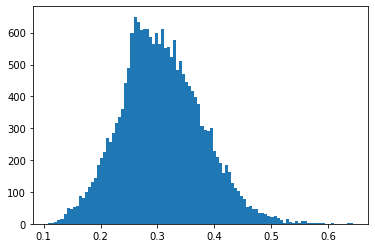

In [13]:
plt.hist(metrics[:,2], bins=100);#np.linspace(0, 1, 101));

In [37]:
def act_s0(x, w, derivative=False):
    func = lambda x: ((np.log1p(np.exp(-np.abs(x / w))) + np.maximum(x / w, 0))**2)
    if derivative:
        func = lambda xx: (1 - np.tanh(xx)**2)
    return ((0 if derivative else 0.001) + 0.999*((0 if derivative else 1.) + func(x)) / 2)

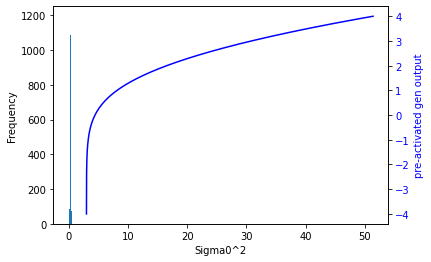

In [38]:
fig, ax1 = plt.subplots() 

ax1.set_xlabel('Sigma0^2') 
ax1.set_ylabel('Frequency') 
ax1.hist(metrics[:,2], bins=np.linspace(0, 1, 101))

ax2 = ax1.twinx() 

xx = np.linspace(-4, 4, 300)
ax2.set_ylabel('pre-activated gen output', color = 'blue') 
ax2.plot(act_s0(xx, w=6), xx, color = 'blue')
ax2.tick_params(axis ='y', labelcolor = 'blue');

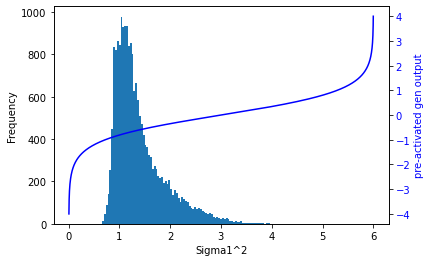

In [67]:
fig, ax1 = plt.subplots() 

ax1.set_xlabel('Sigma1^2') 
ax1.set_ylabel('Frequency') 
ax1.hist(metrics[:,3], bins=100)

ax2 = ax1.twinx() 

xx = np.linspace(-4, 4, 300)
ax2.set_ylabel('pre-activated gen output', color = 'blue') 
ax2.plot(act_s0(xx, w=2), xx, color = 'blue')
ax2.tick_params(axis ='y', labelcolor = 'blue');

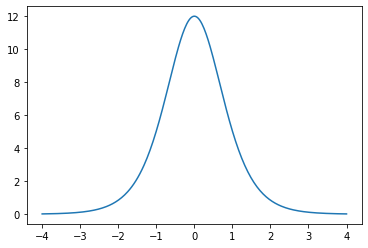

In [60]:
plt.plot(xx, act_s0(xx, w=8, derivative=True));

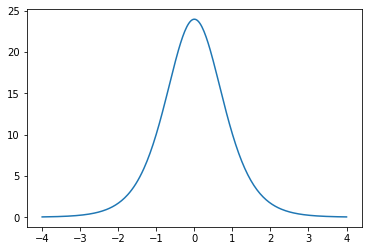

In [61]:
plt.plot(xx, act_s0(xx, w=16, derivative=True));

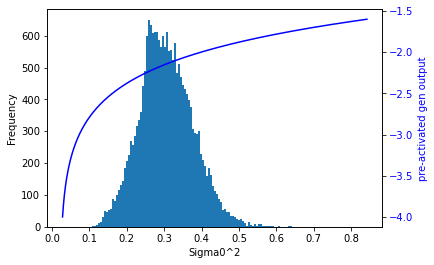

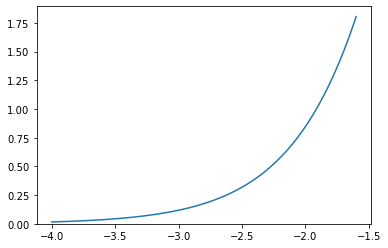

In [74]:
fig, ax1 = plt.subplots() 

ax1.set_xlabel('Sigma0^2') 
ax1.set_ylabel('Frequency') 
ax1.hist(metrics[:,2], bins=100)

ax2 = ax1.twinx() 

xx = np.linspace(-4, -1.6, 300)
ax2.set_ylabel('pre-activated gen output', color = 'blue') 
ax2.plot(act_s0(xx, w=7), xx, color = 'blue')
ax2.tick_params(axis ='y', labelcolor = 'blue');
plt.figure()
plt.plot(xx, act_s0(xx, w=8, derivative=True));
plt.ylim(bottom=0);

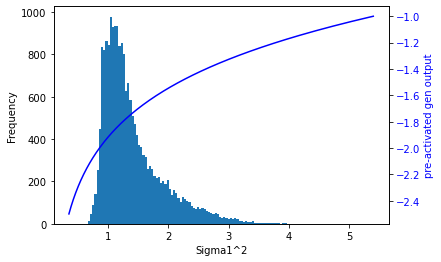

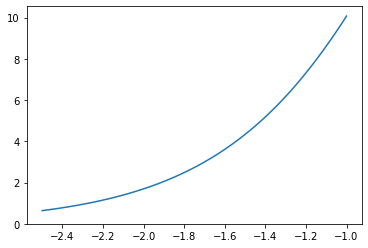

In [75]:
fig, ax1 = plt.subplots() 

ax1.set_xlabel('Sigma1^2') 
ax1.set_ylabel('Frequency') 
ax1.hist(metrics[:,3], bins=100)

ax2 = ax1.twinx() 

xx = np.linspace(-2.5, -1, 300)
ax2.set_ylabel('pre-activated gen output', color = 'blue') 
ax2.plot(act_s0(xx, w=15), xx, color = 'blue')
ax2.tick_params(axis ='y', labelcolor = 'blue');
plt.figure()
plt.plot(xx, act_s0(xx, w=16, derivative=True));
plt.ylim(bottom=0);

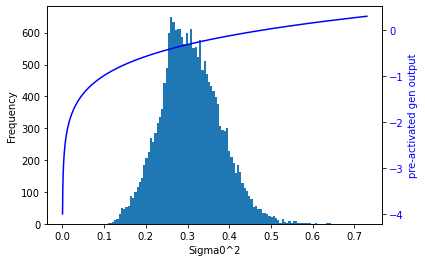

In [90]:
fig, ax1 = plt.subplots() 

ax1.set_xlabel('Sigma0^2') 
ax1.set_ylabel('Frequency') 
ax1.hist(metrics[:,2], bins=100)

ax2 = ax1.twinx() 

xx = np.linspace(-4, 0.3, 300)
ax2.set_ylabel('pre-activated gen output', color = 'blue') 
ax2.plot((np.log(1 + np.exp(xx)))**2, xx, color = 'blue')
ax2.tick_params(axis ='y', labelcolor = 'blue');


# plt.figure()
# plt.plot(xx, 1 / (1 + np.exp(-xx)));
# print(
#     (
#         (1 / (1 + np.exp(-xx))).min()
#     ),
#     (
#         (1 / (1 + np.exp(-xx))).max()
#     )
# )

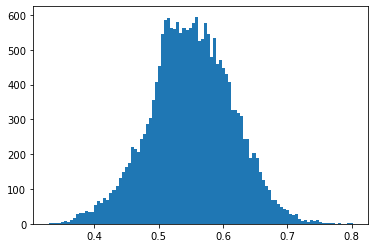

In [83]:
plt.hist(metrics[:,2]**0.5, bins=100);